# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [ ]:
library(tidyverse)
LexicalData <- read.csv('/LexicalData_withIncorrect.csv')
Items <- read.csv('/Items.csv')
Items <- Items %>%
  select(Word, Length, Log_Freq_HAL)

Data <- left_join(LexicalData, Items, by = c('D_Word' = 'Word')) %>%
  drop_na()

head(Data)

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

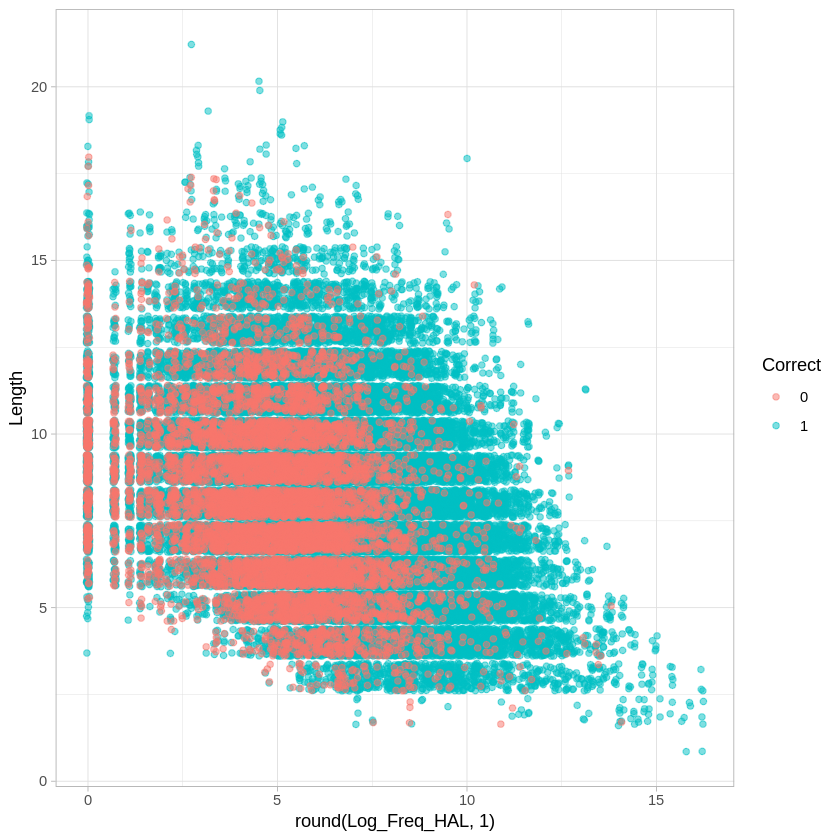

In [ ]:

Data$Correct <- as.factor(Data$Correct) # so that R knows that Correct is categorical, not numeric.

# plot the Correct / Incorrect clusters
ggplot(Data,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?

Words that were shown more frequently had a greater accuracy as they were shown more often. The words that were not shown as often were incorrect more often. As frequency increases, Correctness increawse as well. The lower the length of a word also had increased correctness especially when it was shown more frequently. The longer a word correlates with incorrect responses.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [ ]:
install.packages('ISLR')
library(ISLR)
Model <- glm(Correct ~ Length * Log_Freq_HAL, data = Data, family = 'binomial')
summary(Model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = "binomial", 
    data = Data)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

There is a significant interaction effect between length of the word and frequency which is consistent with the plot above. This means that the correctness is dependent on both length of the word and the frequency, so the effects of one of those variables changes in response to the other variable.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [ ]:
Data_prob = data.frame(predict(Model, type = "response"))
colnames(Data_prob) = c('predicted_prob')

num_observations = nrow(Data_prob)
Data_prob$index = seq(1, num_observations)

threshold = 0.50
Data_prob$predicted_binary <- as.numeric(Data_prob$predicted_prob > threshold)
Data_actual <- as.numeric(Data$Correct)

Data_confusion <- data.frame(predicted = Data_prob$predicted_binary, actual = Data_actual)

Data_confusion = data.frame(Data_prob$predicted_binary, Data$Correct)
colnames(Data_confusion) = c('predicted', 'actual')

table(Data_confusion)
print(paste('Accuracy:',mean(Data_confusion$predicted == Data_confusion$actual)))

         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not?

The model does well at predicting correctness because the accuracy is ~89%.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [ ]:
library(MASS)
qda_model <-qda(Correct ~ Length * Log_Freq_HAL, data = Data)
qda_model


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
qda(Correct ~ Length * Log_Freq_HAL, data = Data)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [ ]:
qda_predict <- predict(qda_model, Data)

confusion_predict <- table(predicted = qda_predict$class, actual = Data$Correct)
print(confusion_predict)

print(paste('Accuracy:',mean(qda_predict$class == Data$Correct)))

         actual
predicted     0     1
        0   455  1647
        1  7524 60963
[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

QDA prediction performance demonstrates a lower accuracy than that of logistic regression by ~2%.

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*